 #  <div style="text-align: center">  SANTANDER CUSTOMER TRANSACTION PREDICTION  <br><br> PART 1: BASIC EDA AND MODELING</div> 
 
 <div style="text-align: center"><font size="+2"><i>Alexey Pronin</i></font></div>
 
 <br>
 
 <div style="text-align: center"><font size="+2"><i>February 24, 2019</i></font></div> 

<br>

<img src="https://static.standard.co.uk/s3fs-public/thumbnails/image/2019/01/23/12/gettyimages-525423384.jpg?w968" width="500"></img>

<a id='0'></a>
## The Table of Content

- <a href='#1'>The Brief Description of the Purpose of the Notebook</a>  
- <a href='#2'>Exploratory Data Analysis</a>  
    - <a href='#3'>Reading the Train and Test Data</a>   
    - <a href='#4'>Getting to Know the Data</a>
    - <a href='#5'>The <i>ID_code</i> Column Values</a>
    - <a href='#6'>The <i>target</i> Column</a>
    - <a href='#7'>The Statistical Summaries of the Numeric Feature Variables</a>
    - <a href='#8'>The Distributions of Values in the Numerical Columns</a>
    - <a href='#9'>The Correlations among the Numerical Features</a>
- <a href='#10'>Modeling</a>
    - <a href='#11'>Logistic Regression</a>
    - <a href='#12'>Elastic Net</a>
    - <a href='#13'>Gaussian Naive Bayes</a>
    - <a href='#14'>Linear Discriminant Analysis (LDA)</a>
    - <a href='#15'>Quadratic Discriminant Analysis (QDA)</a>
    - <a href='#16'>Correlations among the Models</a>
    - <a href='#17'>Soft Voting Classifier</a>
    - <a href='#18'>Confusion matricies</a>
        - <a href='#19'>Logistic Regression</a>
        - <a href='#20'>Elastic Net</a>
        - <a href='#21'>Gaussian Naive Bayes</a>
        - <a href='#22'>LDA</a>
        - <a href='#23'>QDA</a>
- <a href='#24'>Conclusion</a>

<a id='1'></a>
## The Brief Description of the Purpose of the Notebook

This Python notebook is created for the [Kaggle Santander Customer Transaction Prediction competition](https://www.kaggle.com/c/santander-customer-transaction-prediction#evaluation). The main objective of the competition is to identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted, using an anonymized dataset containing numeric feature variables, the binary `target` column, and a string `ID_code` column. The dataset is split into training and testing data stored in *train.csv* and *test.csv* files, respectively. The `target` column is included only in the training dataset. To fulfil the main objective of the competition we need to predict the value of `target` column in the test set.

In this notebook, we will do an introductory exploratory data analysis (EDA) on the data set and build several simple models establishing the baseline for future work. The list of models includes logistic regression, elastic net, Gaussian Naive Bayes, Linear Discriminant Analysis (LDA), and Quanratic Discriminant Analysis (QDA) models.

<a id='2'></a>
## Exploratory Data Analysis

<a id='3'></a>
### Reading the Train and Test Data

We begin by reading the *train.csv* and *train.csv* data files and storing their content in two panda data frames, `test` and `train`.

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

# Define path to the directory containing the train and test data:
path = Path('../input')

train = pd.read_csv(path /'train.csv', header=0)
test = pd.read_csv(path / 'test.csv', header=0)

<a id='4'></a>
### Getting to Know the Data

First of all, let's determine the physical sizes of the train and test datasets (in Mb):

In [2]:
from sys import getsizeof

print("The sizes of the training and testing data are {:.2f} Mb and {:.2f} Mb, respectively."
      .format(getsizeof(train)/(1024**2), getsizeof(test)/(1024**2)))

The sizes of the training and testing data are 319.76 Mb and 318.04 Mb, respectively.


The dimensions of the train and test dataset:

In [3]:
train.shape

(200000, 202)

In [4]:
test.shape

(200000, 201)

We see that both the training and testing datasets contain 200,000 rows. There are 201 features (or variables) that are present in both data sets and one variable that is present only in the training data set (obviously, it must be the `target` variable that we are trying to predict).

Let's take a look at the first few rows of `train`.

In [5]:
train.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

Are their any missing values in the data?

In [6]:
train.isna().sum().sum()

0

In [7]:
test.isna().sum().sum()

0

No missing values! What about the data types? Are they well defined?

In [8]:
train.dtypes.value_counts()

float64    200
object       1
int64        1
dtype: int64

This shows that the data type are well defined for all columns of the data set.
<a id='5'></a>
### The *ID_code* Column Values

It looks like the *ID_code* variable of `train` follows the same pattern: train_0, train_1, train_2, etc. Is it true for all rows? Let's see:

In [9]:
np.array_equal(np.array(['train_' + str(i) for i in range(0, train.shape[0])]), train['ID_code'])

True

Yes, it is true. What about the *ID_code* column of `test`? 

In [10]:
np.array_equal(np.array(['test_' + str(i) for i in range(0, test.shape[0])]), test['ID_code'])

True

Thus, the *ID_code* column of `test` follows the same pattern: test_0, test_1, test_2, etc.

<a id='6'></a>
### The *target* Column

How many zeroes and ones are there in the *target* column?

In [11]:
train_target_counts = train.target.value_counts()
train_target_counts

0    179902
1     20098
Name: target, dtype: int64

In [12]:
ones = train.target.mean()*100
zeroes = 100 - ones

In [13]:
print('Thus, the column contains {:.2f}% of ones and {:.2f}% of zeroes.'.format(ones, zeroes))

Thus, the column contains 10.05% of ones and 89.95% of zeroes.


This shows that the data set is imbalanced. Here is a count plot inllustrating this distribution of values in the *target* column:

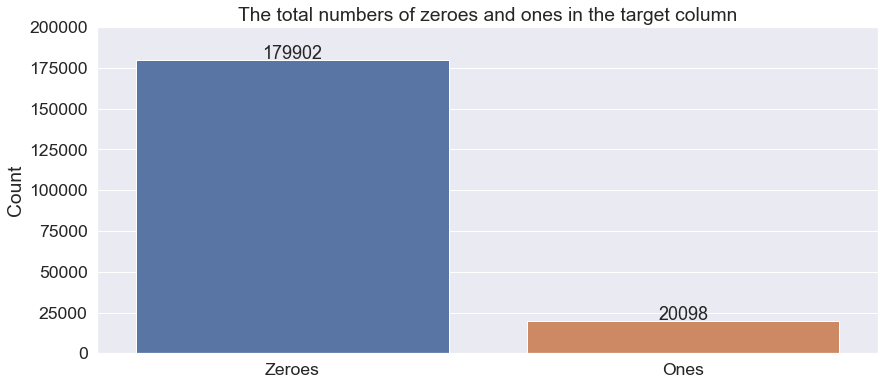

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

width = 14
height = 6
plt.figure(figsize=(width, height))
sns.set(font_scale=1.6)

ax = sns.countplot(x='target', data=train)
ax.set(xlabel='',
       ylabel='Count', 
       title= 'The total numbers of zeroes and ones in the target column', ylim=(0, 200000), 
       xticklabels=['Zeroes', 'Ones'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 350,
            '{:1.0f}'.format(height), fontsize=18,
            ha="center") 

plt.show()

<a id='7'></a>
### The Statistical Summaries of the Numeric Feature Variables

The data set also contains 200 numeric feature variables, *var_0* to *var_199*. We are not given any information about the meaning of these variables, so let's take a little bit closer look at them. 

First of all, it looks like the column names of the numeric features follow the same pattern: *var_0, var_1, var_2,* etc. Let's make sure that this pattern does not break at some point:

In [15]:
features = np.array(['var_' + str(i) for i in range(0, 200)])
np.array_equal(features, train.columns[2:])

True

In [16]:
np.array_equal(features, test.columns[1:])

True

No, the pattern is consistent throughout all numerical columns. 

Now, let's take a look at the summary statistics for these columns:

In [17]:
data_description_train = train.describe()
data_description_train

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [18]:
data_description_test = test.describe()
data_description_test

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean        0.277135       7.569407  ...       3.189766       7.458269   
std         3.333375       1.231865  ...       4.551239       3.025189   
min        -9.956000       4.243300  ...     -14.093300      -2.407000   
25%        -2.303900       6.623800  ...      -0.095000       5.166500   
50%         0.372000       7.632000  ...       3.162400       7.379000   
75%         2.930025       8.584825  ...       6.336475       9.531100   
max         9.665500      11.003600  ...      20.359000      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.925944       3.322016      17.996967      -0.133657   
std         1.479966       3.995599       3.140652       1.429678   
min        -3.340900     -11.413100       9.382800      -4.911900   
25%         0.882975       0.587600      15.634775      -1.160700   
50%         1.892600       3.428500      17.977600      -0.162000   
75%         2.956000       6.174200      20.391725       0.837900   
max         8.005000      17.632600      27.947800       4.545400   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.290899       8.912428      15.869184      -3.246342  
std         5.446346       0.920904       3.008717      10.398589  
min       -13.944200       6.169600       6.584000     -39.457800  
25%        -1.948600       8.260075      13.847275     -11.124000  
50%         2.403600       8.892800      15.943400      -2.725950  
75%         6.519800       9.595900      18.045200       4.935400  
max        15.920700      12.275800      26.538400      27.907400  

[8 rows x 200 columns]

To make it easier to see what is going on let's make a histogram for the maximum and minimum values, their difference, and the standard deviation.

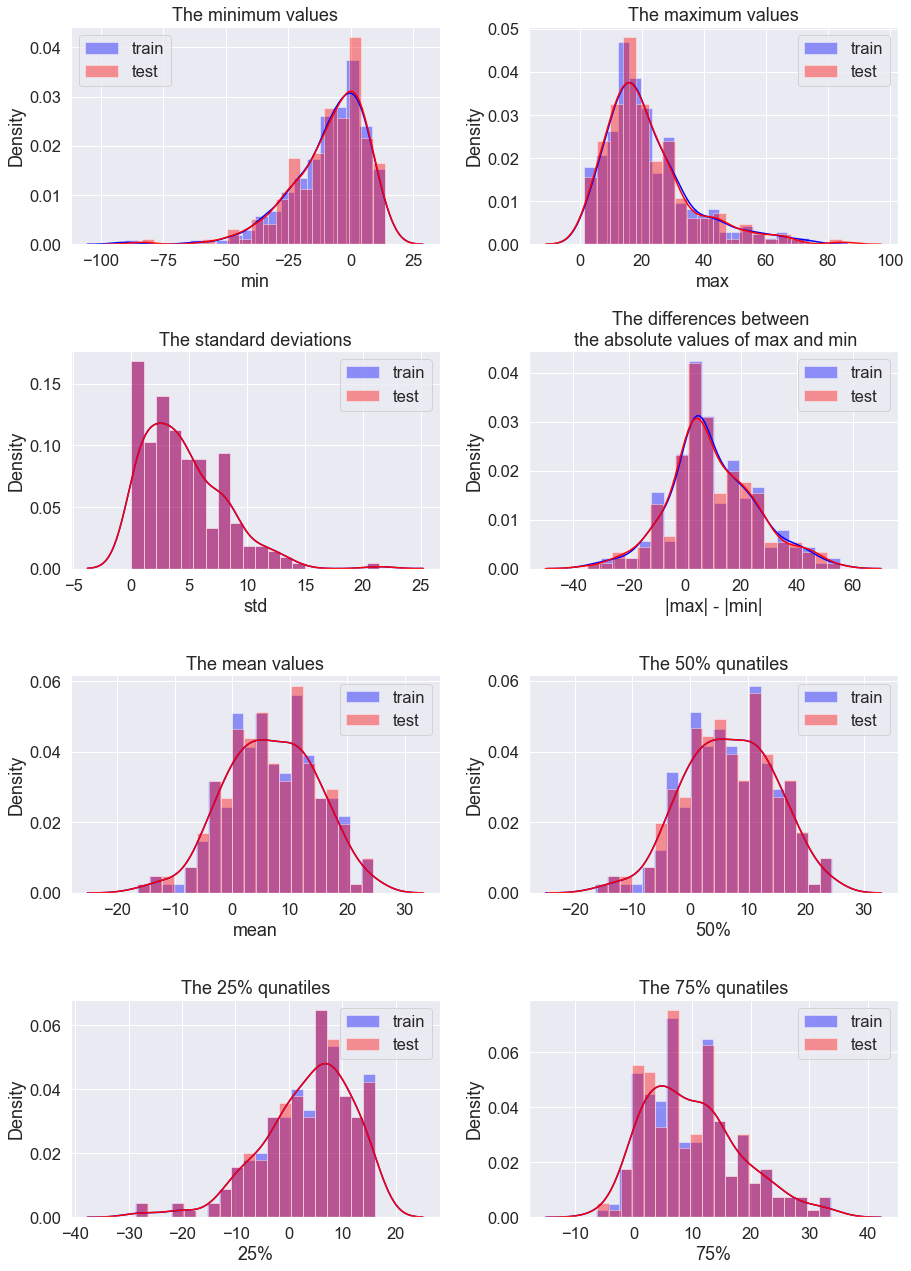

In [19]:
width = 13
height = 18
plt.figure(figsize=(width, height))

sns.set(font_scale=1.5)

col_train = 'blue'
col_test = 'red'

plt.subplot(4, 2, 1)
sns.distplot(data_description_train.loc['min', 'var_0':], bins=20, color=col_train, label='train')
sns.distplot(data_description_test.loc['min', :], bins=20, color=col_test, label='test')
plt.title('The minimum values')
plt.ylabel('Density')
plt.legend()

plt.subplot(4, 2, 2)
sns.distplot(data_description_train.loc['max', 'var_0':], bins=20, color=col_train, label='train')
sns.distplot(data_description_test.loc['max', :], bins=20, color=col_test, label='test')
plt.title('The maximum values')
plt.ylabel('Density')
plt.legend()

plt.subplot(4, 2, 3)
sns.distplot(data_description_train.loc['std', 'var_0':], bins=20, color=col_train, label='train')
sns.distplot(data_description_test.loc['std', :], bins=20, color=col_test, label='test')
plt.title('The standard deviations')
plt.ylabel('Density')
plt.legend()

plt.subplot(4, 2, 4)
sns.distplot((np.absolute(data_description_train.loc['max', 'var_0':]) - 
              np.absolute(data_description_train.loc['min', 'var_0':])), 
              bins=20, color=col_train, label='train')

sns.distplot((np.absolute(data_description_test.loc['max', 'var_0':]) - 
              np.absolute(data_description_test.loc['min', 'var_0':])), 
              bins=20, color=col_test, label='test')

plt.title('The differences between \n the absolute values of max and min')
plt.ylabel('Density')
plt.xlabel('|max| - |min|')
plt.legend()

plt.subplot(4, 2, 5)
sns.distplot(data_description_train.loc['mean', 'var_0':], bins=20, color=col_train, label='train')
sns.distplot(data_description_test.loc['mean', :], bins=20, color=col_test, label='test')
plt.title('The mean values')
plt.ylabel('Density')
plt.legend()

plt.subplot(4, 2, 6)
sns.distplot(data_description_train.loc['50%', 'var_0':], bins=20, color=col_train, label='train')
sns.distplot(data_description_test.loc['50%', :], bins=20, color=col_test, label='test')
plt.title('The 50% qunatiles')
plt.ylabel('Density')
plt.legend()

plt.subplot(4, 2, 7)
sns.distplot(data_description_train.loc['25%', 'var_0':], bins=20, color=col_train, label='train')
sns.distplot(data_description_test.loc['25%', :], bins=20, color=col_test, label='test')
plt.title('The 25% qunatiles')
plt.ylabel('Density')
plt.legend()

plt.subplot(4, 2, 8)
sns.distplot(data_description_train.loc['75%', 'var_0':], bins=20, color=col_train, label='train')
sns.distplot(data_description_test.loc['75%', :], bins=20, color=col_test, label='test')
plt.title('The 75% qunatiles')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()

We see that the training and test data have very similar distributions of the numeric variables. In some cases, they look identical! For instance, look at the standard deviation graph -- you do not see the training data graph at all because they are covered by the test data graph (you can also check out the summary tables above showing the standard deviations for both `train` and `test`). Also, observe that there is not much diversity in the numerical values of these statistical parameters of the data -- all of them have their typical values within 20-60 units away from the origin. Interesting... Is this data set synthetic? 
<a id='8'></a>
### The Distributions of Values in the Numerical Columns

After inspecting the summary statistics, let's turn our attention to individual columns. There are a lot of them, so it would be nice to be able to see the plots showing the distribution of values in these columns -- also, we would like to see whether or not these distributions are the same for the two classes of the *target* column. 

<Figure size 432x288 with 0 Axes>

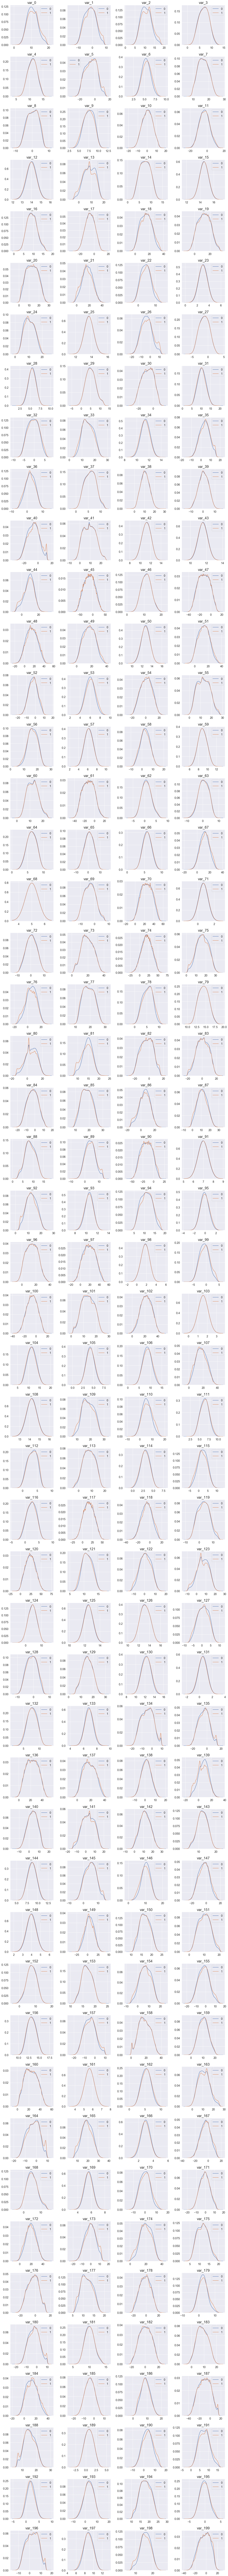

CPU times: user 37.1 s, sys: 10 s, total: 47.2 s
Wall time: 27.1 s


In [20]:
%%time

vsize = 50
hsize = 4

plt.figure()
fig, ax = plt.subplots(vsize,hsize,figsize=(18,200))

for (i, col) in enumerate(features[0:(vsize*hsize)]):
    i += 1
    plt.subplot(vsize,hsize,i)
    
    sns.kdeplot(train.loc[train['target'] == 0, col], bw=0.5,label='0')
    sns.kdeplot(train.loc[train['target'] == 1, col], bw=0.5,label='1')
    
    plt.title(col, fontsize='20')
    plt.xlabel('')
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=16)#, pad=-40)
    plt.tick_params(axis='y', which='major', labelsize=16)
    plt.legend(loc='best', fontsize='16')
    
plt.tight_layout()    
plt.show()

We see that not all variable have the same distributions for `target=0` and `target=1`: *var_81* or *var_110* would be two good examples illustrating this point. I beleive that this observation might become important later when we will be doing feature engineering.

<a id='9'></a>
### The Correlations among the Numerical Features

Let's take a look at correlations.

In [21]:
correlations = train[1:].corr()

The correlations between the numerical features and the `target` variable (in the descending order):

In [22]:
correlations.target.sort_values(ascending=False).head(10)

target     1.000000
var_6      0.066730
var_110    0.064274
var_53     0.063397
var_26     0.062422
var_22     0.060557
var_99     0.058365
var_190    0.055974
var_2      0.055871
var_133    0.054547
Name: target, dtype: float64

In [23]:
correlations.target.sort_values(ascending=False).tail(10)

var_165   -0.055736
var_80    -0.057608
var_166   -0.057774
var_21    -0.058483
var_174   -0.061669
var_76    -0.061919
var_146   -0.063643
var_12    -0.069489
var_139   -0.074078
var_81    -0.080918
Name: target, dtype: float64

The strongest negative correlation we observe is with *var_81* and it is just a bit higher than eight percent. The strongest positive correlation is with *var_6* and it is just above 6.6 percent. Thus we see that correlations are quite weak!

What correlations are the weakest? To find out, let's compute the absolute values of the correlations and sort them in the ascending order:

In [24]:
correlations.target.abs().sort_values().head(10)

var_185    0.000057
var_27     0.000581
var_30     0.000639
var_17     0.000863
var_38     0.000967
var_41     0.001298
var_126    0.001394
var_103    0.001397
var_10     0.002212
var_100    0.002218
Name: target, dtype: float64

What about the correlations of the numerical features among themselves? There are a lot of them -- let's plot the correlation matrix to inspect them visually:

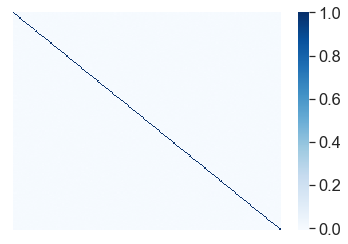

In [25]:
sns.heatmap(correlations.iloc[1:, 1:], xticklabels=False, yticklabels=False, cmap='Blues')

The heatmap plot above suggests that the correlations are quite small! To make sure that this is indeed the case, we will compute the strongest positive and the strongest negative correlations. To do that, we will first need to extract the upper triangular part of the correlation matrix for the numercial features (recall that the matrix is symmetric and we are not interested in the diagonal entries which are all ones). To do this extraction we can use a handy numpy `np.triu_indices()` function that returns the indicies for the upper-triangular part of a numpy matrix. To remove the diagonal elements we will need to set the optional argument `k` to one.

In [26]:
n_corr = correlations.iloc[1:, 1:].shape[0]
n_corr

200

In [27]:
upper_triangular_indx = np.triu_indices(n_corr, k=1)
upper_triangular_indx

(array([  0,   0,   0, ..., 197, 197, 198]),
 array([  1,   2,   3, ..., 198, 199, 199]))

In [28]:
np.array(correlations.iloc[1:, 1:])[upper_triangular_indx].max()

0.009711166101487936

In [29]:
np.array(correlations.iloc[1:, 1:])[upper_triangular_indx].min()

-0.009843439201036296

Both positive and negative correlations are weaker than one percent! The numerical features seem to be fairly independent of each other.

<a id='10'></a>
## Modeling

Okay, let's do some modeling! But first we need to turn our data into `numpy` arrays because this is what works best with *scikit-learn* which we will be using very extensively. 

In [30]:
X_train = train.iloc[:, 2:].values.astype('float')
y_train = train.target.values

<a id='11'></a>
### Logistic Regression

Let's begin our model building with logistic regression.

0.8612830316184605

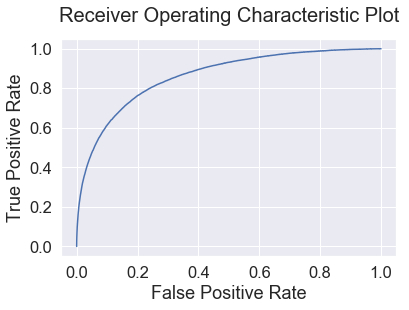

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr_clf', LogisticRegression(solver='lbfgs'))
])

pipe_lr.fit(X_train, y_train)

title_config = {'fontsize': 20, 'y': 1.05}
fpr, tpr, thr = roc_curve(y_train, pipe_lr.predict_proba(X_train)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot', **title_config)
auc(fpr, tpr)

In [32]:
from sklearn.model_selection import cross_val_score

cv_lr = cross_val_score(pipe_lr, X_train, y_train, scoring='roc_auc', cv=5)
cv_lr.mean()

0.8594815338307955

In [33]:
cv_lr.std()

0.003474592654703778

<a id='12'></a>
### Elastic Net

It looks like logistic regression is working reasonably well. The AUC we are getting is about 86 percent. This is not bad at all! Is it possible to improve this result even further by enhancing the logistic regression algorithm? To this end, let's try the elastic net classifier (which goes by the name *Stochastic Gradient Decent* in *scikit-learn*).

In the code below:

* `loss='log'` gives logistic regression;
* `alpha ` is  the penalty strength parameter;
* `l1_ratio` is the ratio between $l_1$ and $l_2$ penalties, ranging from 0 (ridge) to 1 (lasso).

0.8612404574944004

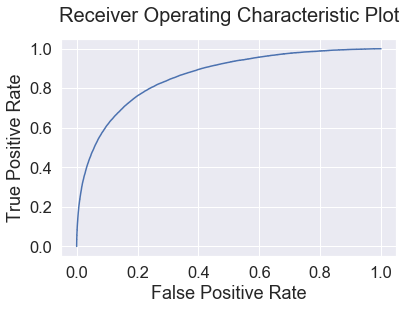

In [34]:
from sklearn.linear_model import SGDClassifier

pipe_sgd = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd_clf', SGDClassifier(loss='log', penalty='elasticnet', random_state=42,
                                        alpha=0.02, l1_ratio=0, max_iter=1000, tol=1e-3))
])

pipe_sgd.fit(X_train, y_train)

fpr, tpr, thr = roc_curve(y_train, pipe_sgd.predict_proba(X_train)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot', **title_config)
auc(fpr, tpr)

In [35]:
cv_sgd = cross_val_score(pipe_sgd, X_train, y_train, scoring='roc_auc', cv=5)
cv_sgd.mean()

0.8595775923053584

In [36]:
cv_sgd.std()

0.003483330585771889

It looks like the ridge regression (`l1_ratio=0`) presented above gives pretty much the same result as the logistic regression that we did earlier. I also tried *lasso* (`l1_ratio=1`) but the performance was significantly worse.

<a id='13'></a>
### Gaussian Naive Bayes

0.8899668718586371

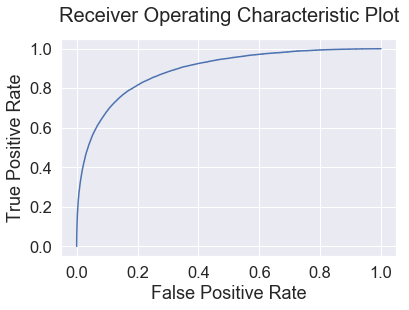

In [37]:
from sklearn.naive_bayes import GaussianNB

pipe_gnb = Pipeline([
    ('scaler', StandardScaler()),
    ('gnb_clf', GaussianNB())
])

pipe_gnb.fit(X_train, y_train)

fpr, tpr, thr = roc_curve(y_train, pipe_gnb.predict_proba(X_train)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot', **title_config)
auc(fpr, tpr)

In [38]:
cv_gnb = cross_val_score(pipe_gnb, X_train, y_train, scoring='roc_auc', cv=5)
cv_gnb.mean()

0.8883828469044662

In [39]:
cv_gnb.std()

0.002839192421515221

This is an improvement! The cross-validation (CV) score has gone up by almost 3% and the CV standard deviation has gone down by about 0.00065. Not bad at all!

<a id='14'></a>
### Linear Discriminant Analysis (LDA)

Now let's try LDA.

0.8611443112858344

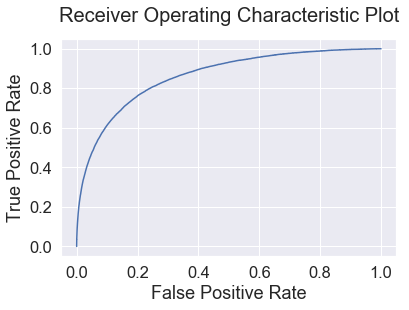

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pipe_lda = Pipeline([
    ('scaler', StandardScaler()),
    ('gnb_clf', LinearDiscriminantAnalysis())
])

pipe_lda.fit(X_train, y_train)

fpr, tpr, thr = roc_curve(y_train, pipe_lda.predict_proba(X_train)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot', **title_config)
auc(fpr, tpr)

In [41]:
cv_lda = cross_val_score(pipe_lda, X_train, y_train, scoring='roc_auc', cv=5)
cv_lda.mean()

0.8595662555613863

In [42]:
cv_lda.std()

0.0034969051423469322

The performance of LDA is about the same as that of logistic regression.

<a id='15'></a>
### Quadratic Discriminant Analysis (QDA)

Now let's try QDA.

0.9230415664249059

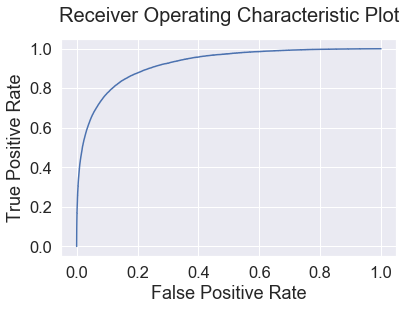

In [43]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
pipe_qda = Pipeline([
    ('scaler', StandardScaler()),
    ('gnb_clf', QuadraticDiscriminantAnalysis())
])

pipe_qda.fit(X_train, y_train)

fpr, tpr, thr = roc_curve(y_train, pipe_qda.predict_proba(X_train)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot', **title_config)
auc(fpr, tpr)

The training AUC looks really good? But is this result true?

In [44]:
cv_qda = cross_val_score(pipe_qda, X_train, y_train, scoring='roc_auc', cv=5)
cv_qda.mean()

0.8426382867182559

In [45]:
cv_qda.std()

0.002466204880351138

The cross-validation AUC is actually worse than that of logistic regression, so QDA is clearly overfitting the data.

<a id='16'></a>
### Correlations among the Models

For the purpose of further analysis, let's compute the correlations among the predictions of these models on the test data:

In [46]:
X_test = test.iloc[:, 1:]
pd.DataFrame({'lr'  : pipe_lr.predict_proba(X_test)[:,1],
              'sgd' : pipe_sgd.predict_proba(X_test)[:,1],
              'gnb'  : pipe_gnb.predict_proba(X_test)[:,1],
              'lda' : pipe_lda.predict_proba(X_test)[:,1],
              'qda' : pipe_lda.predict_proba(X_test)[:,1]
             }).corr()

lr       sgd       gnb       lda       qda
lr   1.000000  0.996636  0.899490  0.999537  0.999537
sgd  0.996636  1.000000  0.896348  0.995886  0.995886
gnb  0.899490  0.896348  1.000000  0.900399  0.900399
lda  0.999537  0.995886  0.900399  1.000000  1.000000
qda  0.999537  0.995886  0.900399  1.000000  1.000000

As side note, let me mention that alternatively, we could have computed the correlations using the `pearsonr` function from `scipy.stats`. For example, the correlation between the Gaussian Naive Bayes (`gnb`) and logistic regression (`lr`) models is

In [47]:
from scipy.stats import pearsonr

a = pipe_lr.predict_proba(X_test)[:,1]
b = pipe_gnb.predict_proba(X_test)[:,1]

pearsonr(a, b)[0]

0.8994900041184986

which matches the corresponding result from the table given above.

<a id='17'></a>
### Soft Voting Classifier

Now, let's build a soft voting classifier using all of the models.

In [48]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('lr', pipe_lr), 
    ('sgd', pipe_sgd), 
    ('gnb', pipe_gnb), 
    ('lda', pipe_lda), 
    ('qda', pipe_qda)
], voting='soft', weights=[7, 7, 30, 3, 1])

voting_clf.fit(X_train, y_train)

cv_voting_clf = cross_val_score(voting_clf, X_train, y_train, scoring='roc_auc', cv=5)
cv_voting_clf.mean()

0.8840039332496227

In [49]:
cv_voting_clf.std()

0.0030238377809469518

This does not look like an improvement comparing to the Naive Bayes result.

<a id='18'></a>
### Confusion matricies

To complete this preliminary analysis, let's compute and plot confusion matricies for all of these classifiers. Frist, we will define a function for plotting a confusion matrix:

In [50]:
def plot_cofusion_matrix(cm, clf_name='Model'):
    plt.figure(figsize=(7,6))

    sns.heatmap(cm, cmap='Blues', annot=True, fmt='d')
    plt.ylabel('True values')
    plt.xlabel('Predicted values')
    plt.title('Confusion matrix: '+clf_name)

    plt.tight_layout()

<a id='19'></a>
#### Logistic Regression

The confusion matrix for the logistic regression:

In [51]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(pipe_lr, X_train, y_train, cv=5)

cm_lr=confusion_matrix(y_train, y_train_pred)

cm_lr

array([[177415,   2487],
       [ 14649,   5449]])

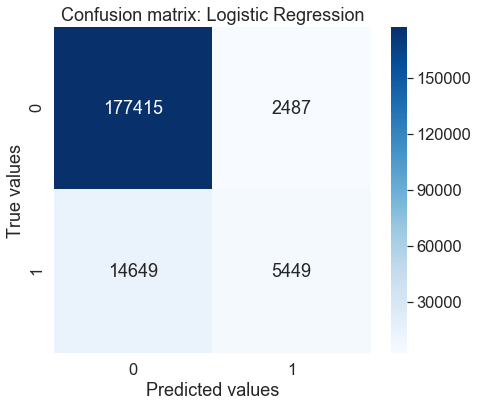

In [52]:
plot_cofusion_matrix(cm_lr, 'Logistic Regression')

<a id='20'></a>
#### Elastic Net

The elastic net confusion matrix:

In [53]:
y_train_pred = cross_val_predict(pipe_sgd, X_train, y_train, cv=5)

cm_sgd=confusion_matrix(y_train, y_train_pred)
cm_sgd

array([[178906,    996],
       [ 16592,   3506]])

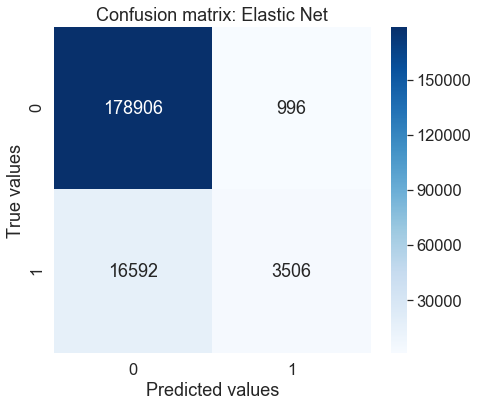

In [54]:
plot_cofusion_matrix(cm_sgd, 'Elastic Net')

<a id='21'></a>
#### Gaussian Naive Bayes

The Gaussian Naive Bayes confusion matrix:

In [55]:
y_train_pred = cross_val_predict(pipe_gnb, X_train, y_train, cv=5)

cm_gnb=confusion_matrix(y_train, y_train_pred)
cm_gnb

array([[176987,   2915],
       [ 12795,   7303]])

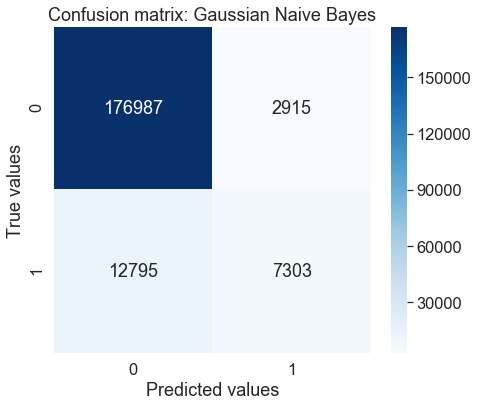

In [56]:
plot_cofusion_matrix(cm_gnb, 'Gaussian Naive Bayes')

<a id='22'></a>
#### LDA

The LDA confusion matrix:

In [57]:
y_train_pred = cross_val_predict(pipe_lda, X_train, y_train, cv=5)

cm_lda=confusion_matrix(y_train, y_train_pred)
cm_lda

array([[177264,   2638],
       [ 14518,   5580]])

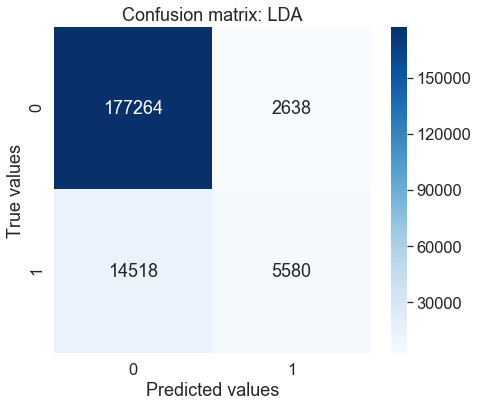

In [58]:
plot_cofusion_matrix(cm_lda, 'LDA')

<a id='23'></a>
#### QDA

The QDA confusion matrix:

In [59]:
y_train_pred = cross_val_predict(pipe_qda, X_train, y_train, cv=5)

cm_qda=confusion_matrix(y_train, y_train_pred)
cm_qda

array([[176153,   3749],
       [ 14162,   5936]])

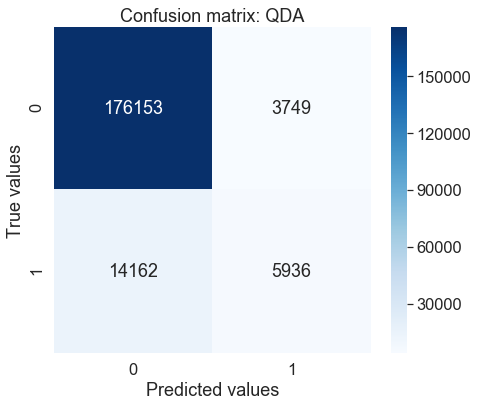

In [60]:
plot_cofusion_matrix(cm_qda, 'QDA')

<a id='24'></a>
## Conclusion

From the computed cross-validation scores of the models considered in this notebook, we see that the Gaussian Naive Bayes model has the best performance. The study of the confusion matrix graphs reveals that all of the classifiers contain a very large number of false negatives which are shown in the lower left quadrants of the corresponding graphs. It means that the classifiers have a very hard time identifying the instances that belong to the positive class (`target=1`). Most of such instances are misclassified as negtatives (`target=0`). It should not look very surpising because the positive class is underrepresented in this imbalanced data set. This suggests that applying some kind of technique alleviating this class imbalance (e.g. upsamling the positive class or downsampling the negative one) might be very helpful here.